In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 17 20:12:59 2022

@author: rclam
"""


# modules
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# ============================================================================
#       Variable Set-Up
# ============================================================================
print("\n*** Setting up variables ***\n")
# scalar crack density (rho)
rho_a = 0.1
# theta (deg)
theta = np.array([0, 30, 45, 60, 90], dtype=float)
# normal tensors for each theta
a_n = np.zeros((5,3))
for i, th in enumerate(theta): 
    th_rad = ((90.0-th)+90.0)*np.pi/180.0
    a_n[i,:] = [ np.cos(th_rad), np.sin(th_rad), 0.0]
# a_n[0] = -1, 0, 0
# a_n[1] = -.5*(3**0.5), 0.5, 0
# a_n[2] = -0.5*(2**0.5), 0.5*(2**0.5), 0
# a_n[3] = -0.5, 0.5*(3**0.5), 0
# a_n[4] = 0, 1, 0
print("n tensors: \n", a_n)

#   Kronecker Delta
## Numpy has identity().
# Kronecker = np.zeros((3,3))
# Kronecker[0,0] = 1.0; Kronecker[1,1] = 1.0; Kronecker[2,2] = 1.0
Kronecker = np.identity(3)



*** Setting up variables ***

n tensors: 
 [[-1.00000000e+00  1.22464680e-16  0.00000000e+00]
 [-8.66025404e-01  5.00000000e-01  0.00000000e+00]
 [-7.07106781e-01  7.07106781e-01  0.00000000e+00]
 [-5.00000000e-01  8.66025404e-01  0.00000000e+00]
 [ 6.12323400e-17  1.00000000e+00  0.00000000e+00]]


In [3]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#       Alpha Set-Up
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# theta = 0 deg.
a_alpha_0 = rho_a * np.outer(a_n[0], a_n[0])
print("\n\u03B1 (\u03B8 = 0\u00B0): \n", a_alpha_0)
# theta = 30 deg.
a_alpha_1 = rho_a * np.outer(a_n[1], a_n[1])
print("\n\u03B1 (\u03B8 = 30\u00B0): \n", a_alpha_1)
# theta = 45 deg.
a_alpha_2 = rho_a * np.outer(a_n[2], a_n[2])
print("\n\u03B1 (\u03B8 = 45\u00B0): \n", a_alpha_2)
# theta = 60 deg.
a_alpha_3 = rho_a * np.outer(a_n[3], a_n[3])
print("\n\u03B1 (\u03B8 = 60\u00B0): \n", a_alpha_3)
# theta = 90 deg.
a_alpha_4 = rho_a * np.outer(a_n[4], a_n[4])
print("\n\u03B1 (\u03B8 = 90\u00B0): \n", a_alpha_4)


α (θ = 0°): 
 [[ 1.00000000e-01 -1.22464680e-17 -0.00000000e+00]
 [-1.22464680e-17  1.49975978e-33  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00  0.00000000e+00]]

α (θ = 30°): 
 [[ 0.075      -0.04330127 -0.        ]
 [-0.04330127  0.025       0.        ]
 [-0.          0.          0.        ]]

α (θ = 45°): 
 [[ 0.05 -0.05 -0.  ]
 [-0.05  0.05  0.  ]
 [-0.    0.    0.  ]]

α (θ = 60°): 
 [[ 0.025      -0.04330127 -0.        ]
 [-0.04330127  0.075       0.        ]
 [-0.          0.          0.        ]]

α (θ = 90°): 
 [[3.74939946e-34 6.12323400e-18 0.00000000e+00]
 [6.12323400e-18 1.00000000e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [4]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#       Intact Properties (Stiffness c_i and Compliance S_i)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# intact stiffness c_i (from healy)
c_i = np.zeros((6,6))
# row 1
c_i[0,0] = 38.83
c_i[0,1] = 4.80
c_i[0,2] = 4.80
# row 2
c_i[1,0] = 4.80
c_i[1,1] = 38.83
c_i[1,2] = 4.80
# row 3
c_i[2,0] = 4.80
c_i[2,1] = 4.80
c_i[2,2] = 38.83
# diagonal for rows 4-6
c_i[3,3] = 17.02
c_i[4,4] = 17.02
c_i[5,5] = 17.02
print("\nIntact stiffness c_i [GPa]: \n", c_i)

S_i = np.linalg.inv(c_i) 
print("\nIntact compliance Tensor S_i (by inversion): \n", S_i)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#       Stress and Pore Fluid Pressure
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Original Stress [MPa]
sigma = np.zeros((3,3))
sigma[0,0] = 40.0 # 73 #87 #[MPa] sigma_1
sigma[1,1] = 90.0 #[MPa] sigma_3
sigma[2,2] = 0.5*(sigma[0,0] + sigma[1,1])
sigma_diff = 0.5*np.abs(sigma[0,0] - sigma[2,2])
print("\nIntact stress tensor sigma: \n", sigma)
# Pore Fluid Pressure
P_f = 50.0 # [MPa]


Intact stiffness c_i [GPa]: 
 [[38.83  4.8   4.8   0.    0.    0.  ]
 [ 4.8  38.83  4.8   0.    0.    0.  ]
 [ 4.8   4.8  38.83  0.    0.    0.  ]
 [ 0.    0.    0.   17.02  0.    0.  ]
 [ 0.    0.    0.    0.   17.02  0.  ]
 [ 0.    0.    0.    0.    0.   17.02]]

Intact compliance Tensor S_i (by inversion): 
 [[ 0.02647334 -0.00291249 -0.00291249  0.          0.          0.        ]
 [-0.00291249  0.02647334 -0.00291249  0.          0.          0.        ]
 [-0.00291249 -0.00291249  0.02647334  0.          0.          0.        ]
 [ 0.         -0.         -0.          0.05875441 -0.         -0.        ]
 [ 0.          0.          0.          0.          0.05875441  0.        ]
 [ 0.          0.          0.          0.          0.          0.05875441]]

Intact stress tensor sigma: 
 [[40.  0.  0.]
 [ 0. 90.  0.]
 [ 0.  0. 65.]]


In [5]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#       Solve for Elastic Moduli
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# print("\n*** Solving for Elastic Moduli (parallel) ***\n")

# Solve for elastic modulii
lambda_i = c_i[0,1]
mu_i     = 0.5* (c_i[0,0] - lambda_i)
# print('c_12 = \u03BB = ', lambda_i)
# print('\u03BC        = ', mu_i)

E0 = mu_i * ((3*lambda_i  +  2*mu_i)/(lambda_i + mu_i))
# print('\nE0 = ', E0)
v = lambda_i/(2*(lambda_i + mu_i))
# print("\u03BD = ", v)
G0 = E0/(2*(1+v))
# print("\nElastic modulii [GPa]: \nYoung's Modulus E =", E0, " GPa\nPoisson ratio   \u03BD = ", v, "\nShear Modulus   G = ", G0," GPa\n")


In [6]:
# ============================================================================
#       Compliance Correction Term
# ============================================================================
print("\n*** Solve for compliance correction term for each ***\n")

delta_s_a = (8*(1-v**2))/(3*E0*(2-v))

#   Voigt Notation: Compliance Correction Term
delta_s_b_0 = np.zeros((6,6))
delta_s_b_1 = np.zeros((6,6))
delta_s_b_2 = np.zeros((6,6))
delta_s_b_3 = np.zeros((6,6))
delta_s_b_4 = np.zeros((6,6))

def Delta_S_b(delta_s_b_num, a_alpha_num):

    #   Row 1
    delta_s_b_num[0,0] = 4 * a_alpha_num[0,0]
    # delta_s_b[0,1] = 0
    # delta_s_b[0,2] = 0
    # delta_s_b[0,3] = 0
    delta_s_b_num[0,4] = 2 * a_alpha_num[0,2]
    delta_s_b_num[0,5] = 2 * a_alpha_num[0,1]
    
    #   Row 2
    # delta_s_b[1,0] = 0
    delta_s_b_num[1,1] = 4 * a_alpha_num[1,1]
    # delta_s_b[1,2] = 0
    delta_s_b_num[1,3] = 2 * a_alpha_num[1,2]
    # delta_s_b[1,4] = 0
    delta_s_b_num[1,5] = 2 * a_alpha_num[1,0]
    
    #   Row 3
    # delta_s_b[2,0] = 0
    # delta_s_b[2,1] = 0
    delta_s_b_num[2,2] = 4 * a_alpha_num[2,2]
    delta_s_b_num[2,3] = 2 * a_alpha_num[2,1]
    delta_s_b_num[2,4] = 2 * a_alpha_num[2,0]
    # delta_s_b[2,5] = 0
    
    #   Row 4
    # delta_s_b[3,0] = 0
    delta_s_b_num[3,1] = 2 * a_alpha_num[2,1]
    delta_s_b_num[3,2] = 2 * a_alpha_num[1,2]
    delta_s_b_num[3,3] = a_alpha_num[1,1] + a_alpha_num[2,2]
    delta_s_b_num[3,4] = a_alpha_num[1,0]
    delta_s_b_num[3,5] = a_alpha_num[2,0]
    
    #   Row 5
    delta_s_b_num[4,0] = 2 * a_alpha_num[2,0]
    # delta_s_b[4,1] = 0
    delta_s_b_num[4,2] = 2 * a_alpha_num[0,2]
    delta_s_b_num[4,3] = a_alpha_num[0,1]
    delta_s_b_num[4,4] = a_alpha_num[0,0] + a_alpha_num[2,2]
    delta_s_b_num[4,5] = a_alpha_num[2,1]
    
    #   Row 6
    delta_s_b_num[5,0] = 2 * a_alpha_num[1,0]
    delta_s_b_num[5,1] = 2 * a_alpha_num[0,1]
    # delta_s_b[5,2] = 0
    delta_s_b_num[5,3] = a_alpha_num[0,2]
    delta_s_b_num[5,4] = a_alpha_num[1,2]
    delta_s_b_num[5,5] = a_alpha_num[0,0] + a_alpha_num[1,1]
    return delta_s_b_num


S_voight_0 = delta_s_a * Delta_S_b(delta_s_b_0, a_alpha_0)
print("\n \u0394S (S_correction term \u03B8 = 0\u00B0): \n", S_voight_0)

S_voight_1 = delta_s_a * Delta_S_b(delta_s_b_1, a_alpha_1)
print("\n \u0394S (S_correction term \u03B8 = 30\u00B0): \n", S_voight_1)

S_voight_2 = delta_s_a * Delta_S_b(delta_s_b_2, a_alpha_2)
print("\n \u0394S (S_correction term \u03B8 = 45\u00B0): \n", S_voight_2)

S_voight_3 = delta_s_a * Delta_S_b(delta_s_b_3, a_alpha_3)
print("\n \u0394S (S_correction term \u03B8 = 60\u00B0): \n", S_voight_3)

S_voight_4 = delta_s_a * Delta_S_b(delta_s_b_4, a_alpha_4)
print("\n \u0394S (S_correction term \u03B8 = 90\u00B0): \n", S_voight_4)



*** Solve for compliance correction term for each ***


 ΔS (S_correction term θ = 0°): 
 [[ 1.47601522e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -9.03798655e-19]
 [ 0.00000000e+00  2.21366826e-34  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -9.03798655e-19]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.53417065e-35
  -4.51899327e-19 -0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 -4.51899327e-19
   3.69003804e-03  0.00000000e+00]
 [-9.03798655e-19 -9.03798655e-19  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  3.69003804e-03]]

 ΔS (S_correction term θ = 30°): 
 [[ 0.01107011  0.          0.          0.         -0.         -0.00319567]
 [ 0.          0.00369004  0.          0.          0.         -0.00319567]
 [ 0.          0.          0.          0.         -0.          0.        ]
 [ 0.          0.          0.          0.

In [7]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#       Solve for new Compliance S_e
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# NEW Compliance S_e
S_e_0 = S_i + S_voight_0
print("S_e 0 [GPa]: \n", S_e_0)

S_e_1 = S_i + S_voight_1
print("S_e 1 [GPa]: \n", S_e_1)

S_e_2 = S_i + S_voight_2
print("S_e 2 [GPa]: \n", S_e_2)

S_e_3 = S_i + S_voight_3
print("S_e 3 [GPa]: \n", S_e_3)

S_e_4 = S_i + S_voight_4
print("S_e 4 [GPa]: \n", S_e_4)

S_e 0 [GPa]: 
 [[ 4.12334957e-02 -2.91249252e-03 -2.91249252e-03  0.00000000e+00
   0.00000000e+00 -9.03798655e-19]
 [-2.91249252e-03  2.64733435e-02 -2.91249252e-03  0.00000000e+00
   0.00000000e+00 -9.03798655e-19]
 [-2.91249252e-03 -2.91249252e-03  2.64733435e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.87544066e-02
  -4.51899327e-19 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.51899327e-19
   6.24444446e-02  0.00000000e+00]
 [-9.03798655e-19 -9.03798655e-19  0.00000000e+00  0.00000000e+00
   0.00000000e+00  6.24444446e-02]]
S_e 1 [GPa]: 
 [[ 0.03754346 -0.00291249 -0.00291249  0.          0.         -0.00319567]
 [-0.00291249  0.03016338 -0.00291249  0.          0.         -0.00319567]
 [-0.00291249 -0.00291249  0.02647334  0.          0.          0.        ]
 [ 0.          0.          0.          0.05967692 -0.00159783 -0.        ]
 [ 0.          0.          0.         -0.00159783  0.06152194  

In [8]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#       Invert for new CRACKED Stiffness c
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
c_0 = np.linalg.inv(S_e_0) 
print("\nStiffness Tensor c0 (cracked) [GPa]: \n", c_0)

c_1 = np.linalg.inv(S_e_1) 
print("\nStiffness Tensor c1 (cracked) [GPa]: \n", c_1)

c_2 = np.linalg.inv(S_e_2) 
print("\nStiffness Tensor c2 (cracked) [GPa]: \n", c_2)

c_3 = np.linalg.inv(S_e_3) 
print("\nStiffness Tensor c3 (cracked) [GPa]: \n", c_3)

c_4 = np.linalg.inv(S_e_4) 
print("\nStiffness Tensor c4 (cracked) [GPa]: \n", c_4)


Stiffness Tensor c0 (cracked) [GPa]: 
 [[2.46831695e+01 3.05122878e+00 3.05122878e+00 0.00000000e+00
  0.00000000e+00 4.01417804e-16]
 [3.05122878e+00 3.86138243e+01 4.58382431e+00 0.00000000e+00
  0.00000000e+00 6.03045142e-16]
 [3.05122878e+00 4.58382431e+00 3.86138243e+01 0.00000000e+00
  0.00000000e+00 1.10507040e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.70200000e+01
  1.23170710e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.23170710e-16
  1.60142348e+01 0.00000000e+00]
 [4.01417804e-16 6.03045142e-16 1.10507040e-16 0.00000000e+00
  0.00000000e+00 1.60142348e+01]]

Stiffness Tensor c1 (cracked) [GPa]: 
 [[27.26964507  3.12068553  3.34342395  0.          0.          1.55526032]
 [ 3.12068553 34.0505075   4.08942761  0.          0.          1.9022788 ]
 [ 3.34342395  4.08942761 38.5915789   0.          0.          0.38038478]
 [ 0.          0.          0.         16.76855871  0.43550909  0.        ]
 [ 0.          0.          0.          0.43550909

In [9]:
def Voigt_to_Full( V, F ):
    """ length 6 vector, V, is converted to 3x3 matrix, F"""
    for i in range(3):
        F[i,i] = V[i]
    F[1,2] = F[2,1] = V[3]
    F[0,2] = F[2,0] = V[4]
    F[0,1] = F[1,0] = V[5]

In [10]:
CS_0 = np.zeros((3,3))
CS_1 = np.zeros((3,3))
CS_2 = np.zeros((3,3))
CS_3 = np.zeros((3,3))
CS_4 = np.zeros((3,3))
S_i_psum = np.sum(S_i[:,0:3], axis=1)

# print(S_i, S_i_psum)
CS_0_V = np.dot( c_0[:,0:3], S_i_psum[0:3] )
CS_1_V = np.dot( c_1[:,0:3], S_i_psum[0:3] )
CS_2_V = np.dot( c_2[:,0:3], S_i_psum[0:3] )
CS_3_V = np.dot( c_3[:,0:3], S_i_psum[0:3] )
CS_4_V = np.dot( c_4[:,0:3], S_i_psum[0:3] )

# for i in range(3):
#     CS_0 = np.dot( c_0[:,0:3], S_i_psum[] * np.sum(S_i[i,0:3])
#     CS_1 = c_1[:,i] * np.sum(S_i[i,0:3])
#     CS_2 = c_2[:,i] * np.sum(S_i[i,0:3])
#     CS_3 = c_3[:,i] * np.sum(S_i[i,0:3])
#     CS_4 = c_4[:,i] * np.sum(S_i[i,0:3])

Voigt_to_Full( CS_0_V, CS_0 )
Voigt_to_Full( CS_1_V, CS_1 )
Voigt_to_Full( CS_2_V, CS_2 )
Voigt_to_Full( CS_3_V, CS_3 )
Voigt_to_Full( CS_4_V, CS_4 )

print(CS_0_V,"\n", CS_0)
print(CS_1_V,"\n", CS_1)
print(CS_2_V,"\n", CS_2)
print(CS_3_V,"\n", CS_3)
print(CS_4_V,"\n", CS_4)

# print(CS_0,"\n", CS_1,"\n", CS_2,"\n", CS_3,"\n",CS_4)

[6.35672663e-01 9.54963399e-01 9.54963399e-01 0.00000000e+00
 0.00000000e+00 2.30222999e-17] 
 [[6.35672663e-01 2.30222999e-17 0.00000000e+00]
 [2.30222999e-17 9.54963399e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.54963399e-01]]
[0.69654666 0.85196409 0.95032894 0.         0.         0.07924683] 
 [[0.69654666 0.07924683 0.        ]
 [0.07924683 0.85196409 0.        ]
 [0.         0.         0.95032894]]
[0.76748023 0.76748023 0.94883819 0.         0.         0.09070563] 
 [[0.76748023 0.09070563 0.        ]
 [0.09070563 0.76748023 0.        ]
 [0.         0.         0.94883819]]
[0.85196409 0.69654666 0.95032894 0.         0.         0.07924683] 
 [[0.85196409 0.07924683 0.        ]
 [0.07924683 0.69654666 0.        ]
 [0.         0.         0.95032894]]
[ 9.54963399e-01  6.35672663e-01  9.54963399e-01  0.00000000e+00
  0.00000000e+00 -1.15111500e-17] 
 [[ 9.54963399e-01 -1.15111500e-17  0.00000000e+00]
 [-1.15111500e-17  6.35672663e-01  0.00000000e+00]
 [ 0.00000000e+00  0

In [11]:
# # ============================================================================
# #       Solve for Biot Tensor
# # ============================================================================
# print("\n\n*** Solving for Biot tensor \u03B2_{ij} ***\n\u03B2_{ij} = \u03B4_{ij} - c_{ijkl} * s_{klmm}\n")

# S_iv_1 = S_i[0,0] + S_i[0,1] + S_i[0,2]
# S_iv_2 = S_i[1,0] + S_i[1,1] + S_i[1,2]
# S_iv_3 = S_i[2,0] + S_i[2,1] + S_i[2,2]

# CS_0 = np.zeros((3,3))
# CS_1 = np.zeros((3,3))
# CS_2 = np.zeros((3,3))
# CS_3 = np.zeros((3,3))
# CS_4 = np.zeros((3,3))

# def CS_calc(CS_num, c_num):
# # row 1
#     CS_num[0,0] = c_num[0,0]*(S_iv_1) + c_num[0,1]*(S_iv_2) + c_num[0,2]*(S_iv_3)   # CS 1
#     CS_num[0,1] = c_num[5,0]*(S_iv_1) + c_num[5,1]*(S_iv_2) + c_num[5,2]*(S_iv_3)   # CS 6
#     CS_num[0,2] = c_num[4,0]*(S_iv_1) + c_num[4,1]*(S_iv_2) + c_num[4,2]*(S_iv_3)   # CS 5
#     # row 2
#     CS_num[1,0] = CS_num[0,1]                                               #      CS 6
#     CS_num[1,1] = c_num[1,0]*(S_iv_1) + c_num[1,1]*(S_iv_2) + c_num[1,2]*(S_iv_3)   # CS 2
#     CS_num[1,2] = c_num[3,0]*(S_iv_1) + c_num[3,1]*(S_iv_2) + c_num[3,2]*(S_iv_3)   # CS 4
#     # row 3
#     CS_num[2,0] = CS_num[0,2]                                               #      CS 5
#     CS_num[2,1] = CS_num[1,2]                                               #      CS 4
#     CS_num[2,2] = c_num[2,0]*(S_iv_1) + c_num[2,1]*(S_iv_2) + c_num[2,2]*(S_iv_3)   # CS 3
    
#     return CS_num
# # print("CS [no units]: \n", CS)

# CS_0 = CS_calc(CS_0, c_0)
# # CS_0[0,0] = 1.02 #1.3   # solve by work backwd by hand
# # CS_0[2,2] = 0.64


# CS_1 = CS_calc(CS_1, c_1)
# # CS_1[0,0] = 0.96 #1.24   # solve by work backwd by hand
# # CS_1[2,2] = 0.7

# CS_2 = CS_calc(CS_2, c_2)
# # CS_2[0,0] = 0.86 #1.14   # solve by work backwd by hand
# # CS_2[2,2] = 0.8

# CS_3 = CS_calc(CS_3, c_3)
# # CS_3[0,0] = 0.76 #1.04   # solve by work backwd by hand
# # CS_3[2,2] = 0.9

# CS_4 = CS_calc(CS_4, c_4)
# # CS_4[0,0] = 0.66 #0.94   # solve by work backwd by hand
# # CS_4[2,2] = 0.96


In [12]:
# ============================================================================
#       Solve for Biot Tensor
# ============================================================================
print("\n\n*** Solving for Biot tensor \u03B2_{ij} ***\n\u03B2_{ij} = \u03B4_{ij} - c_{ijkl} * s_{klmm}\n")

# Biot = Kronecker - CS
Biot_0 = Kronecker - CS_0
print("\nCS 0: \n", CS_0)


print("\nBiot Tensor 0 [no units]: \n", Biot_0)

Biot_1 = Kronecker - CS_1
print("\n\nCS 1: \n", CS_1)
print("\nBiot Tensor 1 [no units]: \n", Biot_1)

Biot_2 = Kronecker - CS_2
print("\n\nCS 2: \n", CS_2)
print("\nBiot Tensor 2 [no units]: \n", Biot_2)

Biot_3 = Kronecker - CS_3
print("\n\nCS 3: \n", CS_3)
print("\nBiot Tensor 3 [no units]: \n", Biot_3)

Biot_4 = Kronecker - CS_4
print("\n\nCS 4: \n", CS_4)
print("\nBiot Tensor 4 [no units]: \n", Biot_4)



*** Solving for Biot tensor β_{ij} ***
β_{ij} = δ_{ij} - c_{ijkl} * s_{klmm}


CS 0: 
 [[6.35672663e-01 2.30222999e-17 0.00000000e+00]
 [2.30222999e-17 9.54963399e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.54963399e-01]]

Biot Tensor 0 [no units]: 
 [[ 3.64327337e-01 -2.30222999e-17  0.00000000e+00]
 [-2.30222999e-17  4.50366011e-02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  4.50366011e-02]]


CS 1: 
 [[0.69654666 0.07924683 0.        ]
 [0.07924683 0.85196409 0.        ]
 [0.         0.         0.95032894]]

Biot Tensor 1 [no units]: 
 [[ 0.30345334 -0.07924683  0.        ]
 [-0.07924683  0.14803591  0.        ]
 [ 0.          0.          0.04967106]]


CS 2: 
 [[0.76748023 0.09070563 0.        ]
 [0.09070563 0.76748023 0.        ]
 [0.         0.         0.94883819]]

Biot Tensor 2 [no units]: 
 [[ 0.23251977 -0.09070563  0.        ]
 [-0.09070563  0.23251977  0.        ]
 [ 0.          0.          0.05116181]]


CS 3: 
 [[0.85196409 0.07924683 0.        ]
 [0.0

In [13]:
# ============================================================================
#       Solve for Effective Stresses
# ============================================================================
print("\n*** Solving for effective stress ***\n         \u03C3' = \u03C3 - Pf*\u03B2_{ij}")


def Effective_Stress(sigma, Biot, P_f=50.0):
    sigma_eff = sigma - P_f * Biot
    print("\nEffective stress [MPa]: \n", sigma, sigma_eff)
    return sigma_eff

# def Effective_Diff_Stress(sigma_eff):
#     sigma_eff_diff = abs(sigma_eff[0,0] - sigma_eff[2,2])
#     # print("\nDifferential \u03C3 [MPa]: ", sigma_eff_diff)
#     return sigma_eff_diff

def Effective_Diff_Stress(sigma_eff):
    w, v = np.linalg.eig(sigma_eff)
    # sort eigenvalues in the ascending order. 
    # Note that sigma follows the compression-is-positive convention.
    ps = np.sort( w ) 
    print(w, ps)
    # sigma3 = ps[0]: Smallest or least compressive
    # sigma1 = ps[2]: Greatest or most compressive
    # diff. stress = sigma1 - sigma3
    sigma_eff_diff = np.array([ps[0], ps[2], (ps[2] - ps[0])])
    return sigma_eff_diff

sigma_eff_0 = Effective_Stress(sigma, Biot_0)
sigma_eff_1 = Effective_Stress(sigma, Biot_1)
sigma_eff_2 = Effective_Stress(sigma, Biot_2)
sigma_eff_3 = Effective_Stress(sigma, Biot_3)
sigma_eff_4 = Effective_Stress(sigma, Biot_4)

sigma_eff_diff_0 = Effective_Diff_Stress(sigma_eff_0)
sigma_eff_diff_1 = Effective_Diff_Stress(sigma_eff_1)
sigma_eff_diff_2 = Effective_Diff_Stress(sigma_eff_2)
sigma_eff_diff_3 = Effective_Diff_Stress(sigma_eff_3)
sigma_eff_diff_4 = Effective_Diff_Stress(sigma_eff_4)


*** Solving for effective stress ***
         σ' = σ - Pf*β_{ij}

Effective stress [MPa]: 
 [[40.  0.  0.]
 [ 0. 90.  0.]
 [ 0.  0. 65.]] [[2.17836331e+01 1.15111500e-15 0.00000000e+00]
 [1.15111500e-15 8.77481699e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.27481699e+01]]

Effective stress [MPa]: 
 [[40.  0.  0.]
 [ 0. 90.  0.]
 [ 0.  0. 65.]] [[24.8273328   3.96234142  0.        ]
 [ 3.96234142 82.59820425  0.        ]
 [ 0.          0.         62.51644689]]

Effective stress [MPa]: 
 [[40.  0.  0.]
 [ 0. 90.  0.]
 [ 0.  0. 65.]] [[28.37401148  4.53528134  0.        ]
 [ 4.53528134 78.37401148  0.        ]
 [ 0.          0.         62.44190947]]

Effective stress [MPa]: 
 [[40.  0.  0.]
 [ 0. 90.  0.]
 [ 0.  0. 65.]] [[32.59820425  3.96234142  0.        ]
 [ 3.96234142 74.8273328   0.        ]
 [ 0.          0.         62.51644689]]

Effective stress [MPa]: 
 [[40.  0.  0.]
 [ 0. 90.  0.]
 [ 0.  0. 65.]] [[ 3.77481699e+01 -5.75557498e-16  0.00000000e+00]
 [-5.75557498e-16  

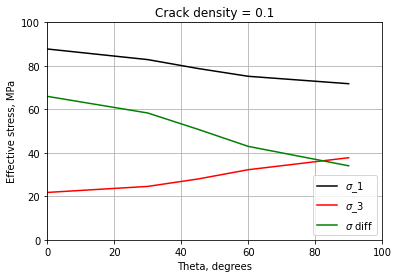

In [14]:
# ============================================================================
#       Plot Graph
# ============================================================================

# sigma_1 = np.array([sigma_eff_0[0,0], sigma_eff_1[0,0], sigma_eff_2[0,0], sigma_eff_3[0,0], sigma_eff_4[0,0]])
# sigma_3 = np.array([sigma_eff_0[2,2], sigma_eff_1[2,2], sigma_eff_2[2,2], sigma_eff_3[2,2], sigma_eff_4[2,2]])
# sigma_diff = np.array([sigma_eff_diff_0, sigma_eff_diff_1, sigma_eff_diff_2, sigma_eff_diff_3, sigma_eff_diff_4])

sigma_3 = np.array([sigma_eff_diff_0[0], sigma_eff_diff_1[0], sigma_eff_diff_2[0], sigma_eff_diff_3[0], sigma_eff_diff_4[0]])
sigma_1 = np.array([sigma_eff_diff_0[1], sigma_eff_diff_1[1], sigma_eff_diff_2[1], sigma_eff_diff_3[1], sigma_eff_diff_4[1]])
sigma_diff = np.array([sigma_eff_diff_0[2], sigma_eff_diff_1[2], sigma_eff_diff_2[2], sigma_eff_diff_3[2], sigma_eff_diff_4[2]])


plt.figure(1)
"""
# theta 0
plt.plot(theta[0], sigma_eff_0[0,0], 'k*', label='$\sigma$_1')
plt.plot(theta[0], sigma_eff_0[2,2], 'r*', label='$\sigma$ 3')
plt.plot(theta[0], (sigma_eff_diff_0), 'g*', label='$\sigma$ diff')
# theta 30
plt.plot(theta[1], sigma_eff_1[0,0], 'k*')
plt.plot(theta[1], sigma_eff_1[2,2], 'r*')
plt.plot(theta[1], (sigma_eff_diff_1), 'g*')
# theta 45
plt.plot(theta[2], sigma_eff_2[0,0], 'k*')
plt.plot(theta[2], sigma_eff_2[2,2], 'r*')
plt.plot(theta[2], (sigma_eff_diff_2), 'g*')
# theta 60
plt.plot(theta[3], sigma_eff_3[0,0], 'k*')
plt.plot(theta[3], sigma_eff_3[2,2], 'r*')
plt.plot(theta[3], (sigma_eff_diff_3), 'g*')
# theta 90
plt.plot(theta[4], sigma_eff_4[0,0], 'k*')
plt.plot(theta[4], sigma_eff_4[2,2], 'r*')
plt.plot(theta[4], (sigma_eff_diff_4), 'g*')
"""
plt.plot(theta, sigma_1, 'k-', label='$\sigma$_1')
plt.plot(theta, sigma_3, 'r-', label='$\sigma$_3')
plt.plot(theta, sigma_diff, 'g-', label='$\sigma$ diff')



plt.xlabel('Theta, degrees')
plt.ylabel('Effective stress, MPa')
# plt.legend(loc='center left')
plt.legend(loc='lower right')
plt.title('Crack density = 0.1')
plt.grid()
plt.ylim([0,100])
plt.xlim([-0.01,100])
plt.show()



